In [46]:
import json
from StringIO import StringIO
import pandas as pd
import numpy as np
import datetime
from scipy.stats import ttest_ind, f_oneway 
import matplotlib.pyplot as plt
import seaborn as sb

In [25]:
from sklearn import linear_model
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error

In [26]:
#Upload most recent file
listings = pd.read_csv('Datasources/listings_augmented/listings_augmented_2018-05-23_V5.csv')
#Dropping the rows identified in featuresExploration notebook:
listings = listings.drop(listings.index[4216:4219])

In [27]:
high_quality_amenities_list = ['has_Other_pet(s)', 'has_Elevator_in_Building', 'has_Indoor_Fireplace', 'has_Buzzer/Wireless_Intercom',
 'has_Gym', 'has_Hot_Tub', 'has_Suitable_for_Events', 'has_Cat(s)', 'has_Pets_live_on_this_property', 'has_Safety_Card','has_Smoking_Allowed',
 'has_Pool', 'has_Pets_Allowed', 'has_Wheelchair_Accessible', 'has_Dog(s)', 'has_Breakfast', 'has_Doorman', 'has_Lock_on_Bedroom_Door']

In [28]:
mid_quality_amenities_list = ['has_Fire_Extinguisher', 'has_Cable_TV', 'has_Air_Conditioning', 'has_Hair_Dryer',
 'has_Iron', 'has_First_Aid_Kit', 'has_Laptop_Friendly_Workspace', 'has_24-Hour_Check-in']

In [29]:
low_quality_amenities_list = ['has_Essentials', 'has_Carbon_Monoxide_Detector', 'has_Internet', 'has_Washer', 'has_Hangers',
 'has_TV', 'has_Kitchen', 'has_Family/Kid_Friendly', 'has_Shampoo', 'has_Heating', 'has_Smoke_Detector', 'has_Free_Parking_on_Premises',
 'has_Dryer', 'has_Wireless_Internet']

In [30]:
def listings_quality_classification(listings):
    listings['amenity_level'] = ''
    
    
    for w in listings.index:
        
        for j in high_quality_amenities_list:
            a = listings[j][w]
            
            if a == 1:
                listings['amenity_level'][w] = 'high'
                break 
                
        if listings['amenity_level'][w] == 'high':
            continue
                
        for k in mid_quality_amenities_list:
            a = listings[k][w]
            
            if a == 1:
                listings['amenity_level'][w] = 'mid_level'
                break
                
        if listings['amenity_level'][w] == 'mid_level':
            continue
            
        else:
            listings['amenity_level'][w] = 'low'
            
    return listings

In [31]:
#Ideas:
#1) Try more amenity levels
#2) Measure impact of each amenity on price, and measure susbsets of all amenities

In [32]:
from itertools import chain, combinations

#Feed only amenity features (just hte names) in this list
lst = list(listings.filter(regex='has').columns)

candidates = list(lst)
min_range = len(lst)-1

def all_subsets(ss):
    return chain(*map(lambda x: combinations(ss, x), range(min_range, len(ss)+1)))
combos = []

for subset in all_subsets(candidates):
    combos.append(subset)

In [33]:
listings.filter(regex='has').columns

Index([u'host_has_profile_pic', u'has_availability', u'has_Other_pet(s)',
       u'has_Essentials', u'has_Carbon_Monoxide_Detector',
       u'has_Elevator_in_Building', u'has_Indoor_Fireplace', u'has_Internet',
       u'has_Washer', u'has_Hangers', u'has_Buzzer/Wireless_Intercom',
       u'has_TV', u'has_Gym', u'has_Fire_Extinguisher', u'has_Hot_Tub',
       u'has_Dryer', u'has_Air_Conditioning', u'has_Suitable_for_Events',
       u'has_Kitchen', u'has_Family/Kid_Friendly', u'has_Shampoo',
       u'has_Heating', u'has_Hair_Dryer', u'has_Smoke_Detector', u'has_Iron',
       u'has_Lock_on_Bedroom_Door', u'has_Free_Parking_on_Premises',
       u'has_Pets_live_on_this_property', u'has_Safety_Card', u'has_Doorman',
       u'has_Pool', u'has_Pets_Allowed', u'has_Wheelchair_Accessible',
       u'has_First_Aid_Kit', u'has_Dog(s)', u'has_Wireless_Internet',
       u'has_Cable_TV', u'has_Laptop_Friendly_Workspace', u'has_Breakfast',
       u'has_Smoking_Allowed', u'has_Cat(s)', u'has_24-Hour_Che

In [34]:
X = listings.copy()
y = listings.price_y

In [35]:
X = X.drop(columns='price_y')

In [36]:
X = X.filter(regex='has')

In [37]:
X.columns

Index([u'host_has_profile_pic', u'has_availability', u'has_Other_pet(s)',
       u'has_Essentials', u'has_Carbon_Monoxide_Detector',
       u'has_Elevator_in_Building', u'has_Indoor_Fireplace', u'has_Internet',
       u'has_Washer', u'has_Hangers', u'has_Buzzer/Wireless_Intercom',
       u'has_TV', u'has_Gym', u'has_Fire_Extinguisher', u'has_Hot_Tub',
       u'has_Dryer', u'has_Air_Conditioning', u'has_Suitable_for_Events',
       u'has_Kitchen', u'has_Family/Kid_Friendly', u'has_Shampoo',
       u'has_Heating', u'has_Hair_Dryer', u'has_Smoke_Detector', u'has_Iron',
       u'has_Lock_on_Bedroom_Door', u'has_Free_Parking_on_Premises',
       u'has_Pets_live_on_this_property', u'has_Safety_Card', u'has_Doorman',
       u'has_Pool', u'has_Pets_Allowed', u'has_Wheelchair_Accessible',
       u'has_First_Aid_Kit', u'has_Dog(s)', u'has_Wireless_Internet',
       u'has_Cable_TV', u'has_Laptop_Friendly_Workspace', u'has_Breakfast',
       u'has_Smoking_Allowed', u'has_Cat(s)', u'has_24-Hour_Che

In [38]:
X = X.drop(columns=['host_has_profile_pic_bin','host_has_profile_pic', 'has_availability'])

In [21]:
lr = linear_model.LinearRegression(fit_intercept=True, normalize=False)

In [40]:
lr.fit(X,y)

/Users/pauldefusco/anaconda2/envs/py27/lib/python2.7/site-packages/scipy/linalg/basic.py:1226: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [41]:
lr.coef_

array([  5.65126329,  18.33364925,   8.1081307 ,  31.56234608,
        52.09273821, -23.97092817, -19.06723758, -21.33690499,
       -10.48809722,  32.79592036,  -4.25840716,   5.90396241,
        30.28707766,  45.77052167,   5.5017901 ,  21.44744455,
        25.61586998,  50.54408109,  -8.96127291,  -3.98359112,
        23.96993034, -23.90398841, -17.81777464, -37.7084133 ,
        34.54733406, -59.92011828, -23.645024  ,  13.17405191,
       -45.71169773,  27.26381035,   5.80645645,  -7.4045833 ,
        -3.81937511, -46.34898452,  52.36609697,   4.23433903,
       -41.97235764, -70.1689222 , -10.51058608, -12.74187655])

Insight: according to the above results, certain amenities have positive effects on price while others have negative effects on it. Suggestion: try grouping amenities this way?

Next: could try to bin the y var, and create a classification model or a logistic regression (if using 1,0 as price bins) to predict price; then look at what amenities have strongest effect

In [55]:
y.describe()

count    5596.000000
mean      206.389563
std       162.731477
min        19.000000
25%        89.806034
50%       153.547291
75%       273.152299
max       999.000000
Name: price_y, dtype: float64

In [56]:
#Could try binning y and seeing if any different algorithms show significant changes in price as a result of amenities
y_binned_10 = pd.cut(y,10)

Trying out log regression with binary version of y based on whether each listing price is above or below mean

In [85]:
y_bin = [1 if i>y.mean() else 0 for i in y]

In [87]:
y_bin = pd.Series(y_bin)

In [88]:
log_reg = linear_model.LogisticRegression()

In [89]:
log_reg.fit(X,y_bin)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [90]:
log_reg.score(X,y_bin)

0.7453538241601144

In [93]:
#Select features with highest coefficients? These would be amenity features that
#cause the price to increase fastest
log_reg.coef_

array([[-0.09073486,  0.23422243,  0.0716817 ,  0.66385557,  0.52875983,
        -0.39445634, -0.28175519, -0.35764975, -0.02247528,  0.60429553,
        -0.10358987,  0.06536548,  0.27558111,  0.89478396, -0.05780896,
         0.2518103 ,  0.57759481,  0.91192704, -0.23923981, -0.11527024,
         0.29613356, -0.24231292, -0.21586042, -0.81467112,  0.67839737,
        -0.85961189, -0.30810304,  0.58429131, -0.79488852,  0.28735929,
         0.03665881, -0.13362426, -0.30457872, -0.60489547,  0.68345725,
         0.15140118, -0.4900511 , -1.28956745, -0.47838641, -0.17209278]])

In [94]:
#find more sophisticated ways to look at feature importance: use this?
#https://stackoverflow.com/questions/34052115/how-to-find-the-importance-of-the-features-for-a-logistic-regression-model

#ideally you would want to train an ML model that predicts price well using only amenity features, after transforming the y variable if needed. Then, you would look at feature importances and group the features based on their effect on the y variable.

Looking at Correlations between Amenity Variables: could this be another way to observe how amenities could be grouped together?

In [44]:
corrmx = X.corr()

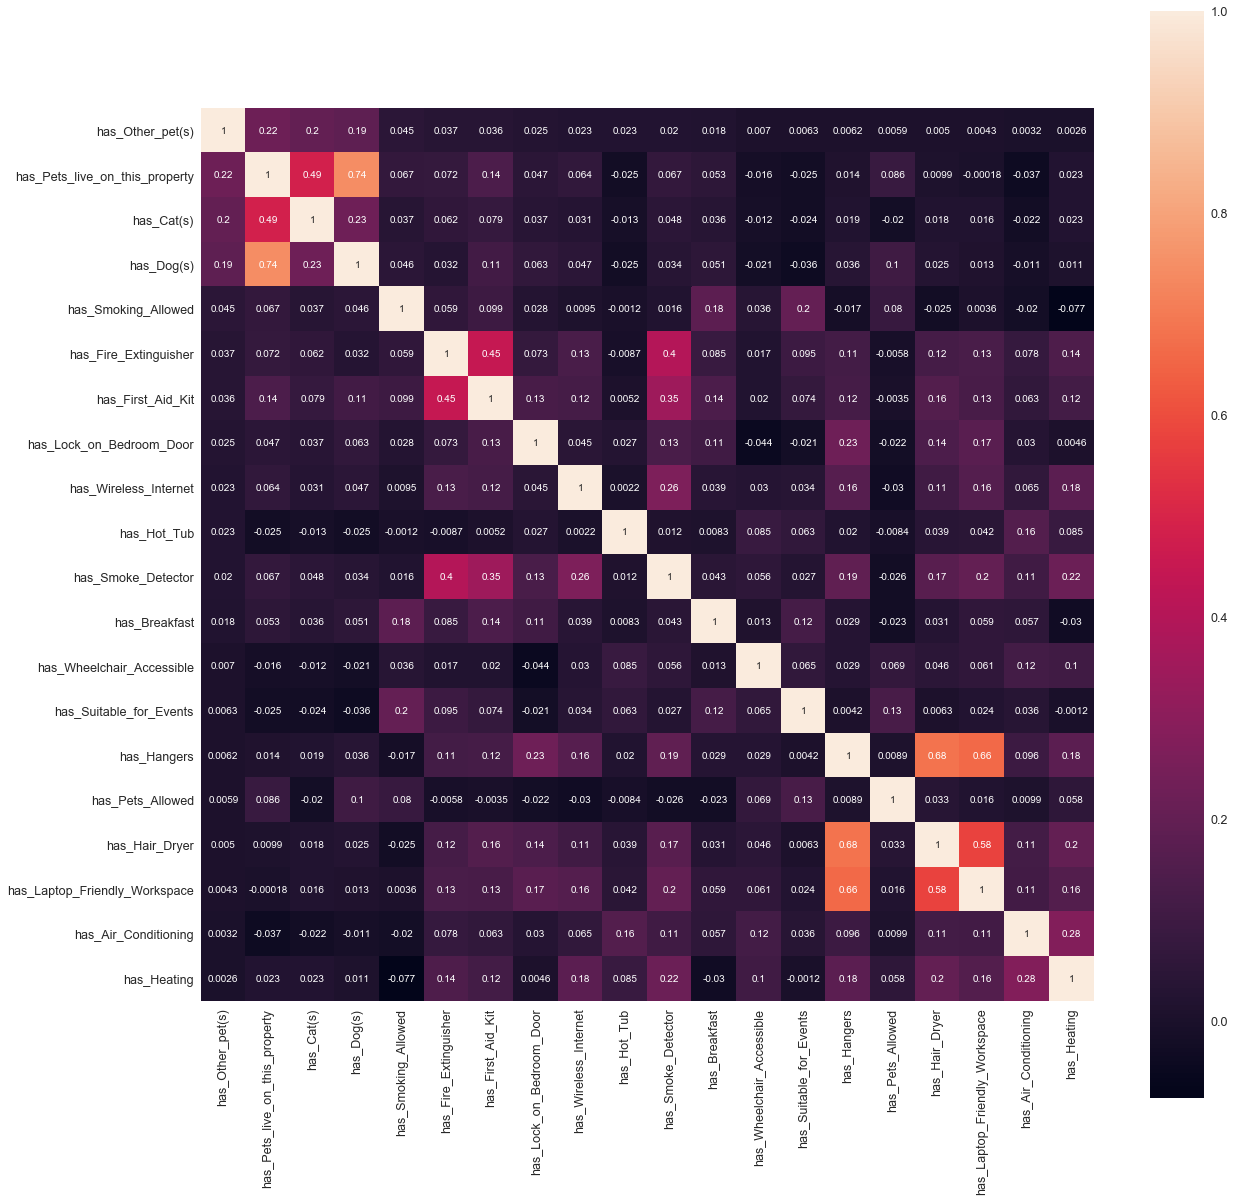

In [54]:
#Notice: only picking the 20 features with highest correlation values
plt.figure(figsize=(20,20))
columns = corrmx.nlargest(20,X.columns).index
cm = np.corrcoef(X[columns].values.T)
sb.set(font_scale=1.25)
hm = sb.heatmap(cm, cbar=True, annot=True, square=True, annot_kws={'size':10}, yticklabels=columns, xticklabels=columns)
plt.show()

In [95]:

L = []
for w in listings['amenity_level'].unique():
    L.append(listings[listings['amenity_level'] == w]['price_y'])
    
f_oneway(L[0], L[1], L[2])

F_onewayResult(statistic=6.798849717476105, pvalue=0.001124295785139379)